In [ ]:
def gaussian_2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return 1 / (2*np.pi*sx*sy) * \
      torch.exp(-((x - mx)**2 / (2*sx**2) + (y - my)**2 / (2*sy**2)))

In [ ]:
import random
import torch
import numpy as np
from matplotlib import pyplot as plt
#### INITIAL POSITIONS
origins=torch.tensor([[x,y] for x in range(0,32,2) for y in range(0,32,2)])
sample_positions= torch.tensor([(x,y) for x in range(32) for y in range(32)]) #SAMPLE POINTS
gaussian_values_1 = torch.zeros((32*32))
for value in origins:
  
  gaussian_values_1+= gaussian_2d(sample_positions[:,0], sample_positions[:,1], mx=value[0], my=value[1], sx=0.5, sy=0.5)
print(gaussian_values_1.shape)
gaussian_values_1=torch.clamp(gaussian_values_1,min=0,max=1)
img_array_1 = np.array((gaussian_values_1.reshape(32,32) > 0.3).detach().numpy())
#plt.imshow((img_array_1)) 

torch.Size([1024])


In [ ]:
img_array_gt= torch.zeros(32, 32)
img_array_gt[:, :16] = 1

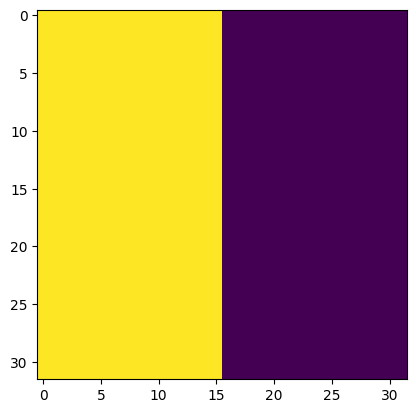

In [ ]:
plt.imshow(img_array_gt.reshape(32,32))

In [ ]:
img_array_gt=img_array_gt.reshape((1024,))

In [ ]:
#origins=torch.tensor([[float(x),(y)] for x in range(0,32,2) for y in range(0,32,2)])
origins=torch.tensor([[float(random.randint(0,32)),(random.randint(0,32))] for x in range(0,32,2) for y in range(0,32,2)])
varx=2
vary=2
mid_origins=0
origins.requires_grad=True
for i in range(1):
  origins.retain_grad()
  gaussian_values_2 = torch.zeros((32*32))
  for value in origins: 
    gaussian_values_2+= gaussian_2d(sample_positions[:,0], sample_positions[:,1], mx=value[0], my=value[1], sx=varx, sy=vary)
  gaussian_values_2=torch.clamp(gaussian_values_2,min=0,max=1)
  loss = torch.nn.MSELoss(reduction='sum')
  if i==10:
    mid_origins=origins.clone()
  output=loss(img_array_gt,gaussian_values_2)
  print(output)
  output.backward()
  origins=origins-0.1*origins.grad

tensor(345.4897, grad_fn=<MseLossBackward0>)


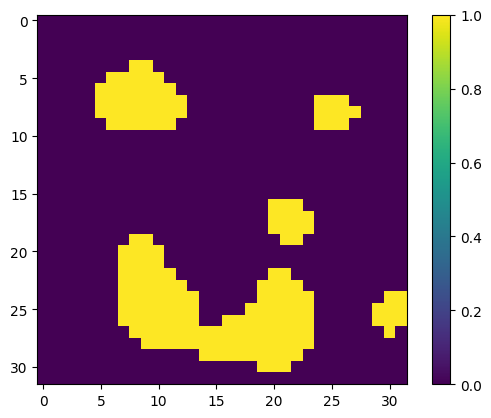

In [ ]:
########## OUTPUT 

#gaussian_values = torch.zeros((32*32))
#for value in origins:
  
  #gaussian_values+= gaussian_2d(sample_positions[:,0], sample_positions[:,1], mx=value[0], my=value[1], sx=2, sy=2)
#print(gaussian_values.shape)
gaussian_values_2=torch.clamp(gaussian_values_2,min=0,max=1)
img_array_2=np.array((gaussian_values_2.reshape(32,32).detach() > 0.3).numpy())
plt.imshow(img_array_2)
plt.colorbar()

In [ ]:
#origins=torch.tensor([[float(x),(y)] for x in range(0,32,2) for y in range(0,32,2)])
origins=torch.tensor([[float(random.randint(0,32)),(random.randint(0,32))] for x in range(0,32,2) for y in range(0,32,2)])
varx=2
vary=2
mid_origins=0
origins.requires_grad=True
for i in range(10000):
  origins.retain_grad()
  gaussian_values_3 = torch.zeros((32*32))
  for value in origins: 
    gaussian_values_3+= gaussian_2d(sample_positions[:,0], sample_positions[:,1], mx=value[0], my=value[1], sx=varx, sy=vary)
  gaussian_values_3=torch.clamp(gaussian_values_3,min=0,max=1)
  loss = torch.nn.MSELoss(reduction='sum')
  if i==10:
    mid_origins=origins.clone()
  output=loss(img_array_gt,gaussian_values_3)
  print(output)
  output.backward()
  origins=origins-0.1*origins.grad

tensor(365.0013, grad_fn=<MseLossBackward0>)
tensor(364.2083, grad_fn=<MseLossBackward0>)
tensor(363.4228, grad_fn=<MseLossBackward0>)
tensor(362.6447, grad_fn=<MseLossBackward0>)
tensor(361.8739, grad_fn=<MseLossBackward0>)
tensor(361.1107, grad_fn=<MseLossBackward0>)
tensor(360.3549, grad_fn=<MseLossBackward0>)
tensor(359.6064, grad_fn=<MseLossBackward0>)
tensor(358.8653, grad_fn=<MseLossBackward0>)
tensor(358.1315, grad_fn=<MseLossBackward0>)
tensor(357.4049, grad_fn=<MseLossBackward0>)
tensor(356.6857, grad_fn=<MseLossBackward0>)
tensor(355.9736, grad_fn=<MseLossBackward0>)
tensor(355.2686, grad_fn=<MseLossBackward0>)
tensor(354.5707, grad_fn=<MseLossBackward0>)
tensor(353.8798, grad_fn=<MseLossBackward0>)
tensor(353.1959, grad_fn=<MseLossBackward0>)
tensor(352.5188, grad_fn=<MseLossBackward0>)
tensor(351.8485, grad_fn=<MseLossBackward0>)
tensor(351.1850, grad_fn=<MseLossBackward0>)
tensor(350.5282, grad_fn=<MseLossBackward0>)
tensor(349.8779, grad_fn=<MseLossBackward0>)
tensor(349

KeyboardInterrupt: ignored

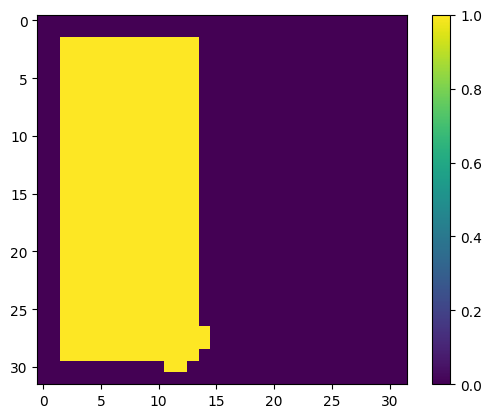

In [ ]:
########## OUTPUT 

#gaussian_values = torch.zeros((32*32))
#for value in origins:
  
  #gaussian_values+= gaussian_2d(sample_positions[:,0], sample_positions[:,1], mx=value[0], my=value[1], sx=2, sy=2)
#print(gaussian_values.shape)
#gaussian_values=torch.clamp(gaussian_values,min=0,max=1)
img_array_final=np.array(gaussian_values_3.reshape(32,32).detach().numpy())
img_array_final = img_array_final > 0.3
plt.imshow(img_array_final)
plt.colorbar()

In [ ]:
import copy
image1 = copy.deepcopy(img_array_1)
image2 = img_array_gt.reshape(32,32).numpy()
image3 = copy.deepcopy(img_array_2)
image4 = copy.deepcopy(img_array_final)

In [ ]:
img_list = [image1, image3, image4, image2]

In [ ]:
def plot_image_grid(images, ncols=None, cmap="gray", column_titles=None):
    """Plot a grid of images"""

    if not ncols:
        factors = [i for i in range(1, len(images) + 1) if len(images) % i == 0]
        ncols = factors[len(factors) // 2] if len(factors) else len(images) // 4 + 1
    nrows = int(len(images) / ncols) + int(len(images) % ncols)
    imgs = [images[i] if len(images) > i else None for i in range(nrows * ncols)]
    f, axes = plt.subplots(nrows, ncols, figsize=(14, 8), dpi=80)
    axes = axes.flatten()[: len(imgs)]
    for img, ax in zip(imgs, axes.flatten()):
        if np.any(img):
            ax.imshow(img)
            if column_titles:
                for i, title in enumerate(column_titles):
                    axes[i].set_title(title)

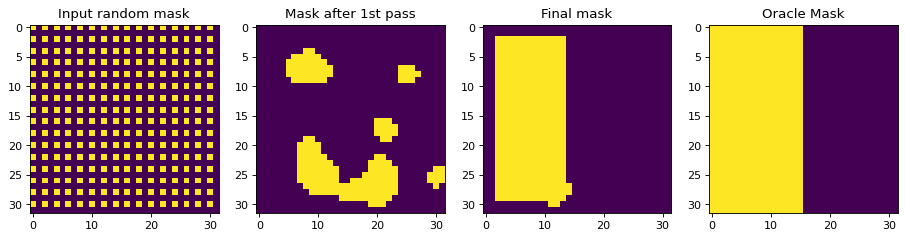

In [ ]:
plot_image_grid(
    img_list,
    ncols=4,
    column_titles=[
        "Input random mask",
        "Mask after 1st pass",
        "Final mask",
        "Oracle Mask",
    ],
)
plt.savefig('fig3.png')